In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df=pd.read_csv("Algerian_forest_fires_cleaned_dataset.csv")
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [17]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [18]:
df=df.drop(['day','month','year'],axis=1)

In [19]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [20]:
###Encoding categories of classes
df['Classes']= np.where(df['Classes'].astype(str).str.contains('not fire'),0,1)

In [21]:
df['Classes']

0      0
1      0
2      0
3      0
4      0
      ..
239    1
240    0
241    0
242    0
243    0
Name: Classes, Length: 244, dtype: int64

In [22]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [23]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
239,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
240,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
241,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
243,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [24]:
X = df[['Temperature','RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI','Classes','Region']]
y = df[['FWI']]


In [25]:
##Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [26]:
X_train.shape,y_train.shape

((183, 11), (183, 1))

In [27]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.376284,0.607551,0.455504,0.566670,0.518119,0.273496
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.226941,-0.690637,-0.348587,-0.580957,-0.435023,-0.406424
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.079135,0.015248,0.029756,0.032368,-0.066529,-0.176829
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.298023,-0.347105,-0.299171,-0.324422,-0.379449,-0.041080
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.507397,0.739730,0.589652,0.691132,0.770114,0.224680
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875925,0.674499,0.982073,0.875864,0.584188,0.191094
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.508643,1.000000,0.635891,0.922895,0.735511,0.268421
BUI,0.455504,-0.348587,0.029756,-0.299171,0.589652,0.982073,0.941988,0.635891,1.000000,0.857973,0.583882,0.087370
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

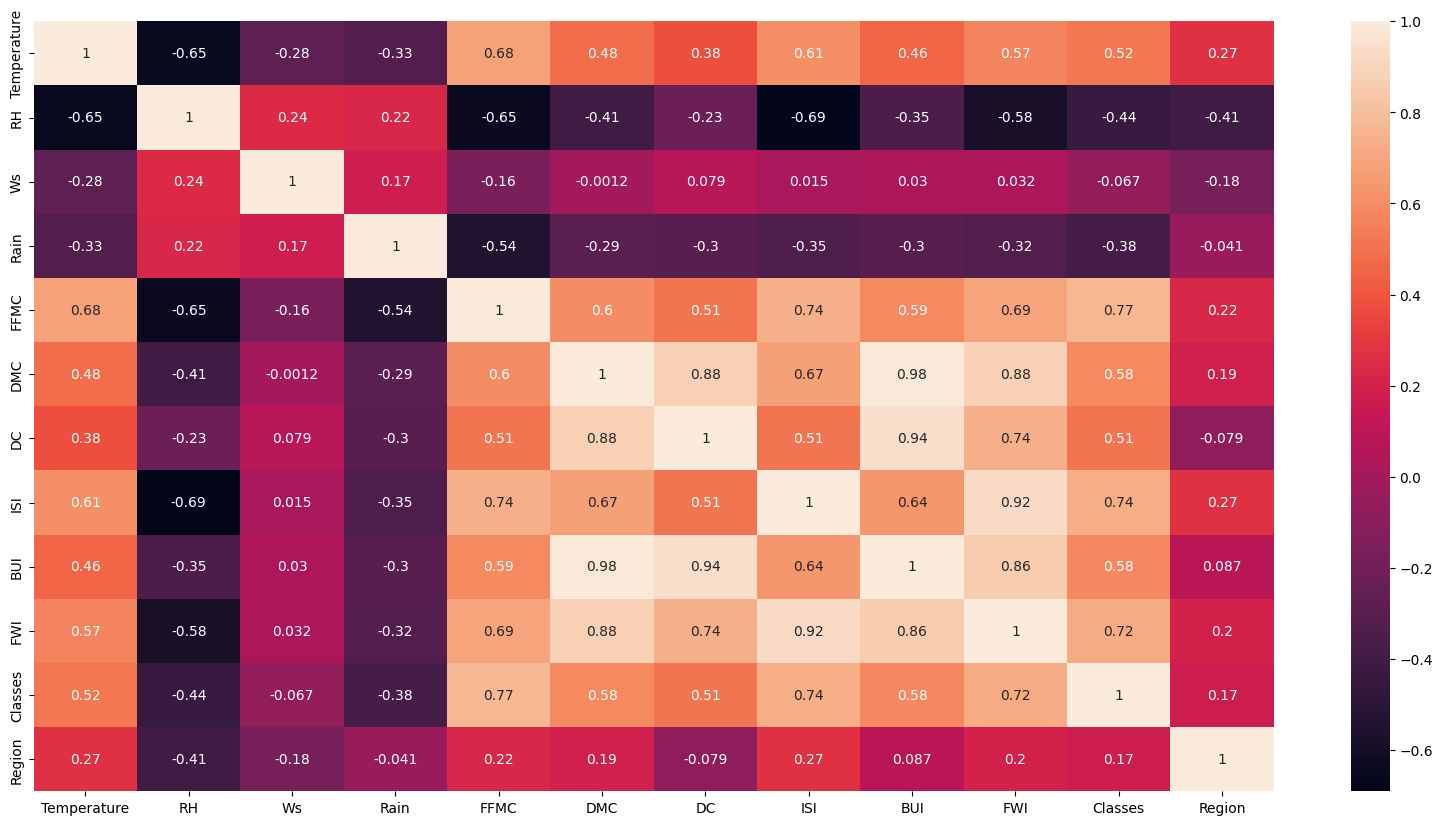

In [28]:
##Check for multicollinearity
plt.figure(figsize=(20,10))
data = df.corr()
sns.heatmap(data,annot=True)

In [29]:
def correlation(df, threshold):
    col_corr = set()
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [30]:
##Threshold--Domain expertise
corr_features = correlation(X_train,0.85)

In [31]:
corr_features

{'BUI', 'DC'}

In [32]:
##Drop features when correlation is more than 0.85
X_train.drop(corr_features, axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((183, 9), (61, 9))

In [33]:
##Standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [34]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
X_train_scaled

array([[-0.81085018,  0.16311382,  1.29231566, ..., -0.773495  ,
        -1.1098231 , -1.00547949],
       [ 1.06405791, -0.44884168,  0.15167049, ...,  0.83939993,
         0.9010445 ,  0.99455037],
       [-0.27516216,  0.63907922, -0.60875963, ..., -0.21981465,
         0.9010445 ,  0.99455037],
       ...,
       [-1.88222624,  0.91105944,  0.53188555, ..., -1.08644476,
        -1.1098231 , -1.00547949],
       [ 0.26052587, -0.38084663,  0.15167049, ...,  0.47830405,
         0.9010445 ,  0.99455037],
       [-0.54300617,  0.9790545 ,  2.05274578, ..., -0.86978723,
        -1.1098231 , -1.00547949]], shape=(183, 9))

In [36]:
X_test_scaled

array([[-2.75162156e-01,  9.51187672e-02, -2.28544571e-01,
        -3.81132246e-01,  6.38241722e-01, -4.01362602e-02,
         2.37573464e-01,  9.01044498e-01, -1.00547949e+00],
       [ 2.60525871e-01, -5.84831795e-01, -9.88974688e-01,
        -3.81132246e-01,  7.42136256e-01, -3.84555270e-01,
         4.06084874e-01,  9.01044498e-01, -1.00547949e+00],
       [ 2.60525871e-01, -9.92802132e-01,  1.51670488e-01,
        -3.81132246e-01,  7.00578442e-01, -5.44750158e-01,
         5.02377108e-01,  9.01044498e-01,  9.94550368e-01],
       [ 7.96213899e-01, -6.52826851e-01,  5.31885546e-01,
        -1.47707879e-01,  1.88032075e-01,  4.80497126e-01,
        -4.84618295e-01,  9.01044498e-01,  9.94550368e-01],
       [ 2.13543397e+00, -1.46876753e+00, -2.12961986e+00,
        -3.34447373e-01,  1.00533574e+00,  6.32682270e-01,
         1.15234969e+00,  9.01044498e-01,  9.94550368e-01],
       [ 1.86758995e+00,  9.51187672e-02, -2.50983492e+00,
         1.79086236e-01, -2.55251270e-01, -2.403798

Text(0.5, 1.0, 'After scaled trained data ')

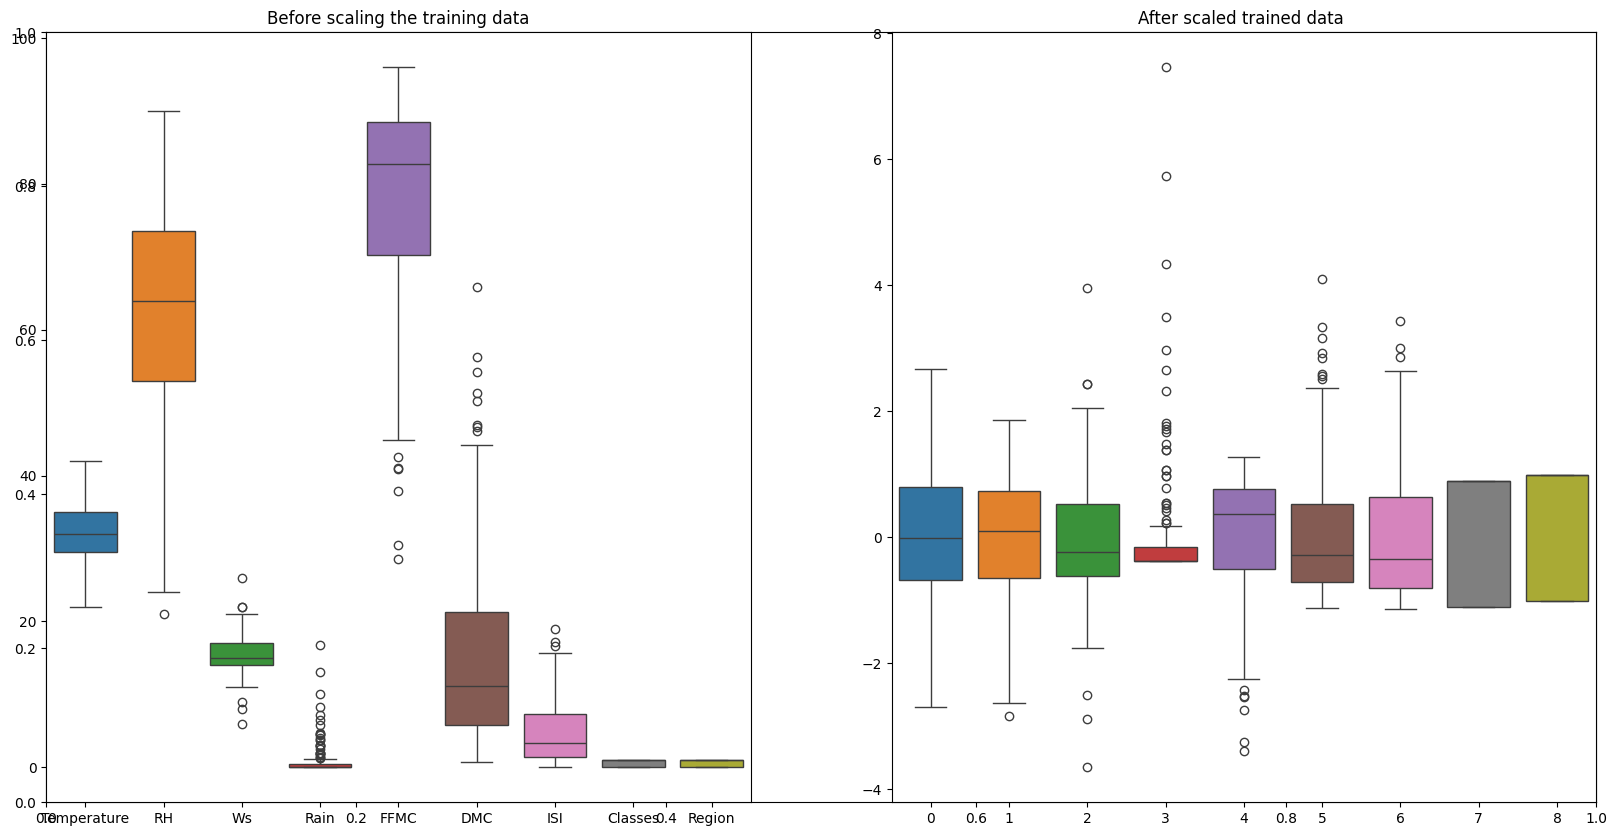

In [37]:
##BOXPLOT OF SS
plt.subplots(figsize=(20,10))
plt.subplot(1,2,1)
sns.boxplot(X_train)
plt.title("Before scaling the training data")
plt.subplot(1,2,2)
sns.boxplot(X_train_scaled)
plt.title("After scaled trained data ")

In [38]:
y_train.shape

(183, 1)

In [39]:
print(y.isnull().sum())

FWI    1
dtype: int64


In [40]:
df = df.dropna(subset=['FWI'])


In [41]:
X = df[['Temperature','RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI']]
y = df['FWI']


In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [44]:
print(y_train.isnull().sum())   # MUST be 0
print(X_train_scaled.shape, y_train.shape)


0
(194, 9) (194,)


In [45]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error,mean_absolute_error,root_mean_squared_error,r2_score,adjusted_rand_score
mse= mean_squared_error(y_test,y_pred)
mae= mean_absolute_error(y_test,y_pred)
rmse= np.sqrt(mse)
score = r2_score(y_test,y_pred)
adj= 1 - ( 1-score) * ( len(y_test) - 1 ) / ( len(y_test) - X.shape[1] - 1 )
print("MSE",mse)
print("MAE",mae)
print("RMSE",rmse)
print("R2",score)
print("ADJ",adj)

MSE 0.3554363825776483
MAE 0.42401793869163995
RMSE 0.5961848560452104
R2 0.9882726857720828
ADJ 0.9855663824887173


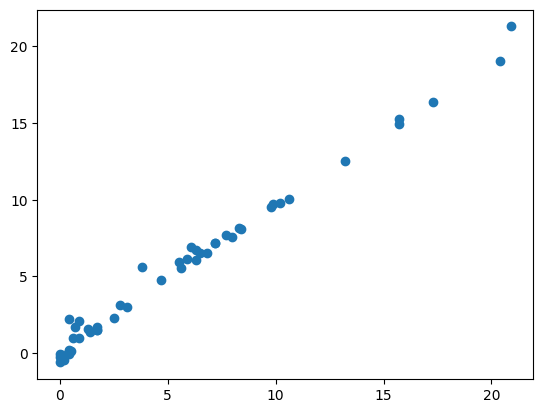

In [46]:
plt.scatter(y_test,y_pred)

In [51]:
##Ridge
from sklearn.linear_model import Ridge
ridge=Ridge()


In [52]:
ridge.fit(X_train_scaled, y_train)

y_pred = ridge.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error,mean_absolute_error,root_mean_squared_error,r2_score,adjusted_rand_score
mse= mean_squared_error(y_test,y_pred)
mae= mean_absolute_error(y_test,y_pred)
rmse= np.sqrt(mse)
score = r2_score(y_test,y_pred)
adj= 1 - ( 1-score) * ( len(y_test) - 1 ) / ( len(y_test) - X.shape[1] - 1 )
print("MSE",mse)
print("MAE",mae)
print("RMSE",rmse)
print("R2",score)
print("ADJ",adj)

MSE 0.564523189837628
MAE 0.4769024031723191
RMSE 0.7513475825725587
R2 0.9813740484635791
ADJ 0.9770757519551743


Ridge cross validation


MAE =  0.67710502568147
R2_score 0.9677193576959423


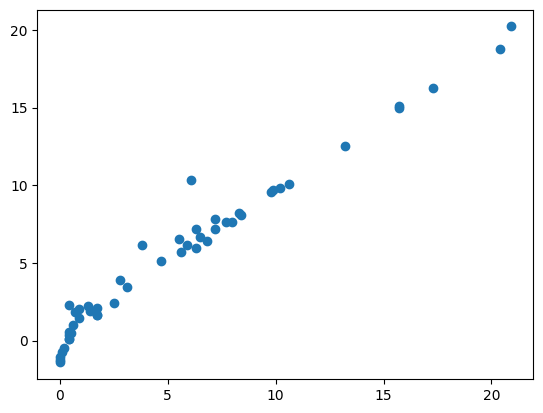

In [61]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)

y_pred2= ridgecv.predict(X_test_scaled)
plt.scatter(y_test,y_pred2)
mae=mean_absolute_error(y_test,y_pred2)
score = r2_score(y_test,y_pred2)
print("MAE = ",mae)
print("R2_score",score)

In [66]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': False}

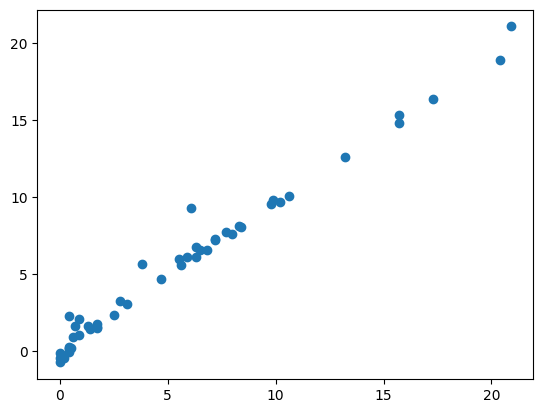

In [53]:
plt.scatter(y_test,y_pred)

MSE 1.4308089977464669
MAE 0.9552746314709517
RMSE 1.1961642854334293
R2 0.9527917018651335
ADJ 0.9418974792186259


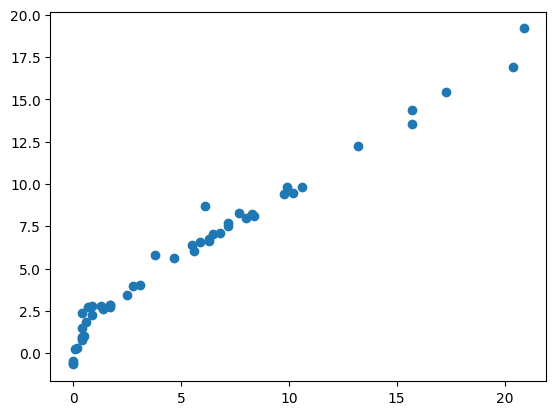

In [55]:
##LASSO
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)

y_pred = lasso.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error,mean_absolute_error,root_mean_squared_error,r2_score,adjusted_rand_score
mse= mean_squared_error(y_test,y_pred)
mae= mean_absolute_error(y_test,y_pred)
rmse= np.sqrt(mse)
score = r2_score(y_test,y_pred)
adj= 1 - ( 1-score) * ( len(y_test) - 1 ) / ( len(y_test) - X.shape[1] - 1 )
print("MSE",mse)
print("MAE",mae)
print("RMSE",rmse)
print("R2",score)
print("ADJ",adj)
plt.scatter(y_test,y_pred)

LASSO CROSS VALIDATION


In [57]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)

,"eps eps: float, default=1e-3Length of the path. ``eps=1e-3`` means that``alpha_min / alpha_max = 1e-3``.",0.001
,"n_alphas n_alphas: int, default=100Number of alphas along the regularization path... deprecated:: 1.7 `n_alphas` was deprecated in 1.7 and will be removed in 1.9. Use `alphas` instead.",'deprecated'
,"alphas alphas: array-like or int, default=NoneValues of alphas to test along the regularization path.If int, `alphas` values are generated automatically.If array-like, list of alpha values to use... versionchanged:: 1.7 `alphas` accepts an integer value which removes the need to pass `n_alphas`... deprecated:: 1.7 `alphas=None` was deprecated in 1.7 and will be removed in 1.9, at which point the default value will be set to 100.",'warn'
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto false, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"precompute precompute: 'auto', bool or array-like of shape (n_features, n_features), default='auto'Whether to use a precomputed Gram matrix to speed upcalculations. If set to ``'auto'`` let us decide. The Grammatrix can also be passed as argument.",'auto'
,"max_iter max_iter: int, default=1000The maximum number of iterations.",1000
,"tol tol: float, default=1e-4The tolerance for the optimization: if the updates are smaller or equal to``tol``, the optimization code checks the dual gap for optimality and continuesuntil it is smaller or equal to ``tol``.",0.0001
,"copy_X copy_X: bool, default=TrueIf ``True``, X will be copied; else, it may be overwritten.",True
,"cv cv: int, cross-validation generator or iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross-validation,- int, to specify the number of folds.- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For int/None inputs, :class:`~sklearn.model_selection.KFold` is used.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: bool or int, default=FalseAmount of verbosity.",False
,"n_jobs n_jobs: int, default=NoneNumber of CPUs to use during the cross validation.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None


MAE =  0.4437379112709109
R2_score 0.9866949177804951


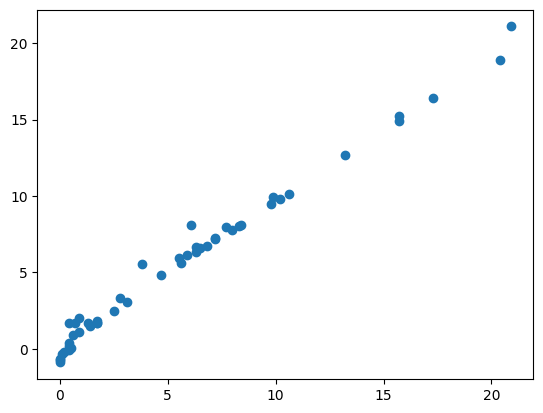

In [60]:
y_pred1= lassocv.predict(X_test_scaled)
plt.scatter(y_test,y_pred1)
mae=mean_absolute_error(y_test,y_pred1)
score = r2_score(y_test,y_pred1)
print("MAE = ",mae)
print("R2_score",score)

In [ ]:
##Elastic Net
from sklearn.linear_model import ElasticNet
el=ElasticNet()
el.fit(X_train_scaled, y_train)

y_pred = el.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error,mean_absolute_error,root_mean_squared_error,r2_score,adjusted_rand_score
mse= mean_squared_error(y_test,y_pred)
mae= mean_absolute_error(y_test,y_pred)
rmse= np.sqrt(mse)
score = r2_score(y_test,y_pred)
adj= 1 - ( 1-score) * ( len(y_test) - 1 ) / ( len(y_test) - X.shape[1] - 1 )
print("MSE",mse)
print("MAE",mae)
print("RMSE",rmse)
print("R2",score)
print("ADJ",adj)

MSE 4.024340344969736
MAE 1.6165226744317265
RMSE 2.0060758572321578
R2 0.8672203913305506
ADJ 0.8365789431760623


MODEL PICKING IN ML


In [67]:
scaler

,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True


In [68]:
ridge

,"alpha alpha: {float, ndarray of shape (n_targets,)}, default=1.0Constant that multiplies the L2 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Ridge` object is not advised.Instead, you should use the :class:`LinearRegression` object.If an array is passed, penalties are assumed to be specific to thetargets. Hence they must correspond in number.",1.0
,"fit_intercept fit_intercept: bool, default=TrueWhether to fit the intercept for this model. If setto false, no intercept will be used in calculations(i.e. ``X`` and ``y`` are expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=NoneMaximum number of iterations for conjugate gradient solver.For 'sparse_cg' and 'lsqr' solvers, the default value is determinedby scipy.sparse.linalg. For 'sag' solver, the default value is 1000.For 'lbfgs' solver, the default value is 15000.",None
,"tol tol: float, default=1e-4The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for each solver:- 'svd': `tol` has no impact.- 'cholesky': `tol` has no impact.- 'sparse_cg': norm of residuals smaller than `tol`.- 'lsqr': `tol` is set as atol and btol of scipy.sparse.linalg.lsqr, which control the norm of the residual vector in terms of the norms of matrix and coefficients.- 'sag' and 'saga': relative change of coef smaller than `tol`.- 'lbfgs': maximum of the absolute (projected) gradient=max|residuals| smaller than `tol`... versionchanged:: 1.2 Default value changed from 1e-3 to 1e-4 for consistency with other linear models.",0.0001
,"solver solver: {'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'}, default='auto'Solver to use in the computational routines:- 'auto' chooses the solver automatically based on the type of data.- 'svd' uses a Singular Value Decomposition of X to compute the Ridge coefficients. It is the most stable solver, in particular more stable for singular matrices than 'cholesky' at the cost of being slower.- 'cholesky' uses the standard :func:`scipy.linalg.solve` function to obtain a closed-form solution.- 'sparse_cg' uses the conjugate gradient solver as found in :func:`scipy.sparse.linalg.cg`. As an iterative algorithm, this solver is more appropriate than 'cholesky' for large-scale data (possibility to set `tol` and `max_iter`).- 'lsqr' uses the dedicated regularized least-squares routine :func:`scipy.sparse.linalg.lsqr`. It is the fastest and uses an iterative procedure.- 'sag' uses a Stochastic Average Gradient descent, and 'saga' uses its improved, unbiased version named SAGA. Both methods also use an iterative procedure, and are often faster than other solvers when both n_samples and n_features are large. Note that 'sag' and 'saga' fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from :mod:`sklearn.preprocessing`.- 'lbfgs' uses L-BFGS-B algorithm implemented in :func:`scipy.optimize.minimize`. It can be used only when `positive` is True.All solvers except 'svd' support both dense and sparse data. However, only'lsqr', 'sag', 'sparse_cg', and 'lbfgs' support sparse input when`fit_intercept` is True... versionadded:: 0.17 Stochastic Average Gradient descent solver... versionadded:: 0.19 SAGA solver.",'auto'
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.Only 'lbfgs' solver is supported in this case.",False
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag' or 'saga' to shuffle the data.See :term:`Glossary ` for details... versionadded:: 0.17 `random_state` to support Stochastic Average Gradient.",None


In [ ]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))###this is used for standard scaling
pickle.dump(ridge,open('ridge.pkl','wb'))###This is used for prediction